In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/wine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
print(df.shape)
df.describe().transpose()

(178, 14)


,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic.acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
#Check the distinct number of classes in the target variable
df['Wine'].unique()

array([1, 2, 3])

In [6]:
df['Wine'].value_counts()

,count
Wine,
2,71
1,59
3,48


In [7]:
X = df.drop('Wine',axis=1)
y = df['Wine']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Scale the Train and Test Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
scaler.mean_

array([1.29739098e+01, 2.34669173e+00, 2.36067669e+00, 1.95488722e+01,
       9.95714286e+01, 2.27030075e+00, 2.00195489e+00, 3.62631579e-01,
       1.59819549e+00, 5.01969925e+00, 9.50270677e-01, 2.59751880e+00,
       7.40015038e+02])

In [9]:
scaler.var_

array([6.77548623e-01, 1.33490033e+00, 7.29476624e-02, 1.15858070e+01,
       2.19914071e+02, 4.16414947e-01, 1.01070896e+00, 1.47667590e-02,
       3.14357646e-01, 5.06390668e+00, 5.26791448e-02, 5.04277302e-01,
       9.35584509e+04])

In [10]:
std=np.sqrt(scaler.var_)
print(std)

[8.23133418e-01 1.15537887e+00 2.70088249e-01 3.40379303e+00
 1.48295000e+01 6.45302214e-01 1.00534022e+00 1.21518554e-01
 5.60676062e-01 2.25031257e+00 2.29519378e-01 7.10124850e-01
 3.05873260e+02]


In [11]:
%%time
from sklearn.model_selection import GridSearchCV
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(13,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter': [500]
         }
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 1.000
Test Accuracy : 0.956
Best Accuracy Through Grid Search : 1.000
Best Parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}
CPU times: user 1.26 s, sys: 155 ms, total: 1.42 s
Wall time: 58.4 s


In [12]:
#Train MLP with the best parameters
mlp = MLPClassifier(activation= 'relu', hidden_layer_sizes= (50,100), learning_rate='constant', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 100), max_iter=500)

In [13]:
predictions = mlp.predict(X_test)

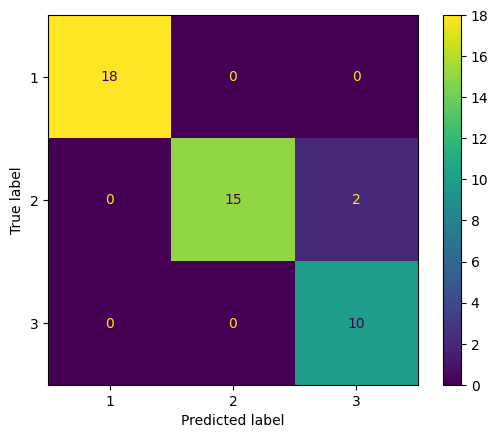

In [14]:
# import all the required packages for classification model evaluation
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Construct and plot the confusion matrix for the fuly-grown tree (clf model)
mlp_cm_test = confusion_matrix(y_test, predictions, labels=mlp.classes_ )
disp = ConfusionMatrixDisplay(mlp_cm_test,display_labels=mlp.classes_   )
disp.plot()


In [15]:
# display the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.88      0.94        17
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

